In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import poisson, norm

Here we are figuring out our operating voltage.  Notice the count starts to blow up around 950.

Our operating voltage is 780

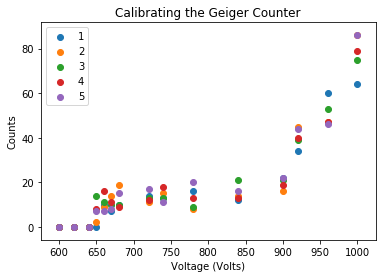

In [2]:
df = pd.read_excel('geiger_calibration.xlsx')
X = df.values
for i in range(1, len(X[0])):
    plt.scatter(X[:, 0], X[:,i])
    
plt.title('Calibrating the Geiger Counter')
plt.ylabel('Counts')
plt.xlabel('Voltage (Volts)')
plt.legend([1,2,3,4,5])
plt.show()

2.25 2.6141666666666667 0.09334821309960298 0.16228922528048642 0.187220943088719
chi2 for poisson
14.448196394392925 8 16 4.0
chi2 for gaussian
32.666269343131944 8 16 4.0
count rate 22.5


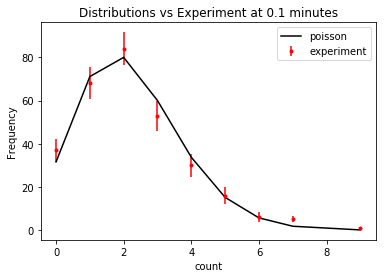

In [3]:
# load data and format for analysis
df1 = pd.read_excel('0.1min_interval_geiger.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(std**2/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print('chi2 for poisson')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

expected_values = sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
    
print('chi2 for gaussian')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

print('count rate {}'.format(mean*10))


# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), fmt='-k')
plt.errorbar(x, y, yerr=np.sqrt(yvar), fmt='.r') # binomial std for error bars
#plt.errorbar(x, sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Distributions vs Experiment at 0.1 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()

In [4]:
print(x, '\n', y)

[0 1 2 3 4 5 6 7 9] 
 [37 68 84 53 30 16  6  5  1]


23.383333333333333 20.83638888888889 0.5892988614855353 4.25894317722335 4.299519756317613
chi2 for poisson
22.09163381909985 18 36 6.0
chi2 for gaussian
23.123185469058054 18 36 6.0
count rate 23.383333333333333


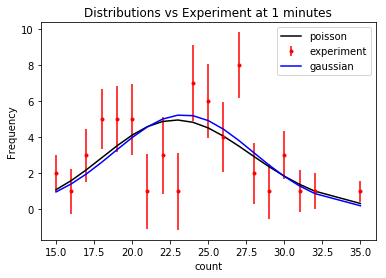

In [12]:
# load data and format for analysis
df1 = pd.read_excel('1min_interval_geiger.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(std**2/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print('chi2 for poisson')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

expected_values = sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
    
print('chi2 for gaussian')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

print('count rate {}'.format(mean))

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), fmt='-k')
plt.errorbar(x, y, yerr=np.sqrt(yvar), fmt='.r') # binomial std for error bars
plt.errorbar(x, sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Distributions vs Experiment at 1 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()

In [6]:
print(x, '\n', y)

[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 35] 
 [2 1 3 5 5 5 1 3 1 7 6 4 8 2 1 3 1 1 1]


237.83333333333334 147.80555555555557 4.963291172121505 150.26081029700032 150.3427596207093
chi2 for poisson
18.01775283289524 4 8 2.8284271247461903
chi2 for gaussian
17.67198064660683 4 8 2.8284271247461903
count rate 23.783333333333335


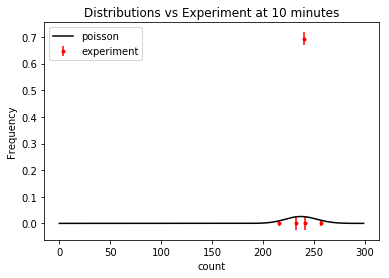

In [7]:
# load data and format for analysis
df1 = pd.read_excel('10min_interval_geiger.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(std**2/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = np.log(exp)-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print('chi2 for poisson')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance


expected_values = np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
chi2_arr = []
for i, exp in enumerate(y):
    numer = np.log(exp)-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)   
print('chi2 for gaussian')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

print('count rate {}'.format(mean/10))


# plot
X = np.arange(0, 300, 1)
plt.errorbar(X, poisson.pmf(X, mean), fmt='-k')
plt.errorbar(x, np.log(y), yerr=yvar, fmt='.r') # binomial std for error bars
#plt.errorbar(X, np.exp(-(X-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Distributions vs Experiment at 10 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()

In [8]:
print(x, '\n', y)

[216 233 240 241 257] 
 [1 1 2 1 1]


1.2967741935483872 1.0732154006243495 0.05883863665402482 0.08177782721776573 0.10074521421766446
chi2 for poisson
6.062625409177406 5 10 3.1622776601683795
chi2 for gaussian
13.263246970946911 5 10 3.1622776601683795
count rate 12.967741935483872


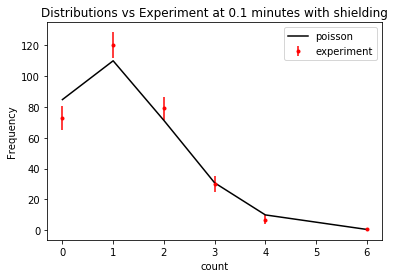

In [9]:
# load data and format for analysis
df1 = pd.read_excel('0.1min_interval_geiger_shield.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(std**2/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print('chi2 for poisson')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

expected_values = sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
    
print('chi2 for gaussian')
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

print('count rate {}'.format(mean*10))

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), fmt='-k')
plt.errorbar(x, y, yerr=np.sqrt(yvar), fmt='.r') # binomial std for error bars
#plt.errorbar(x, sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Distributions vs Experiment at 0.1 minutes with shielding')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()

In [10]:
df1 = pd.read_excel('table.xlsx', index_col=0)
df1

,0.1 min w/o shielding,0.1 min w shielding,1 min,10 min
N Samples,300.000,300.000,60.000,6.00
Mean,2.250,1.300,23.400,237.83
Variance,2.610,1.070,20.800,147.81
Uncertainty of Mean,0.090,0.065,0.624,6.29
Uncertainty of Variance,0.162,0.082,4.260,150.26
Delta,0.184,0.104,4.300,150.39


In [11]:
print(x, '\n', y)

[0 1 2 3 4 6] 
 [ 73 120  79  30   7   1]


In [16]:
100*(0.093)**2 + (0.589)**2 + (4.96)**2/100

1.457837

In [17]:
(22.5+23.4+23.8)/3

23.233333333333334